# Stellar Fusion

* Stellar fusion, also known as nuclear fusion in the context of stars, is the process by which multiple atomic nuclei combine to form a heavier nucleus, releasing energy in the process. This is the fundamental reaction that powers stars, including our own Sun, and is responsible for the synthesis of elements heavier than hydrogen in the universe.

## The Process

**Here's a step-by-step breakdown of how stellar fusion typically occurs**:

- **High Temperature and Pressure**: Inside a star, temperatures and pressures are extremely high, particularly in the core. For the Sun, the core temperature is about 15 million degrees Celsius (27 million degrees Fahrenheit).

- **Hydrogen Fusion**: In the cores of stars like the Sun, hydrogen nuclei (protons) collide with such force that they overcome the electrostatic repulsion between them (because they both have positive charge) and fuse together. This process is called the proton-proton chain reaction.
- **Formation of Helium**: In stars the size of the Sun, four hydrogen nuclei ultimately combine to form a helium nucleus (two protons and two neutrons) in a multi-step process that involves intermediate particles and gamma rays. This conversion also releases positrons and neutrinos.
- **Energy Release**: The mass of the resulting helium nucleus is slightly less than the total mass of the four hydrogen nuclei that went into making it. The missing mass is converted into energy according to Einstein's mass-energy equivalence principle $E=mc2$. This energy is emitted as electromagnetic radiation, including the visible light and heat that reach Earth from the Sun.
- **Heavier Element Synthesis**: In more massive stars, the fusion process can continue to combine lighter elements into heavier ones, such as carbon, oxygen, and silicon, all the way up to iron, through various fusion reactions such as the carbon-nitrogen-oxygen (CNO) cycle and other fusion pathways.

In [20]:
import numpy as np
import pandas as pd
from numpy.random import default_rng
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import Image
%matplotlib inline
plt.style.use("dark_background")

In [2]:
protonMass = 1.6726219236951*10**(-27) # kg

In [3]:
atomicMass = 1.66054*10**(-27) # kg
amuProton = protonMass/atomicMass
print(f"Proton Mass in Atomic Mass Unit(AMU): {amuProton} u")

Proton Mass in Atomic Mass Unit(AMU): 1.00727590042703 u


In [4]:
speedofLight = 299792458 # m/s
protonEnergy = protonMass*speedofLight**2
print(f"Proton's Rest Energy: {protonEnergy} J")

Proton's Rest Energy: 1.5032776159897095e-10 J


$1 eV = 1.602176634 \times 10^{-10} J$

In [5]:
eV = 1.602176634*10**(-19) # J
protonEnergyEV = protonEnergy/eV
print(f"Proton's Rest Energy as eV: {protonEnergyEV} eV or {protonEnergyEV/10**6} MeV")

Proton's Rest Energy as eV: 938272088.1633513 eV or 938.2720881633513 MeV


# Mass Excess

* Mass excess is a concept in nuclear physics that quantifies the difference between the actual mass of an atomic nucleus and its mass number. The mass number (A) of a nucleus is the total number of protons and neutrons it contains. Since the mass of a proton or neutron is roughly 1 atomic mass unit (amu), one might expect the mass of a nucleus to be roughly equal to its mass number. However, due to binding energy within the nucleus, this is not the case.

The mass excess ($\Delta$) of a nucleus is defined as the difference between the actual mass of the nucleus (m) and its mass number (A), scaled by the atomic mass unit (u):
> $\Delta M = m - A \times u$

* The actual mass (m) of the nucleus is typically less than the mass number (A) times the atomic mass unit (u) due to the binding energy that holds the nucleus together. This is described by Einstein’s equation $E = mc^{2}$, where the binding energy (E) corresponds to a "missing" mass ($\Delta M$) in the nucleus:
> $E_{\text{bindings}} = \Delta M \times c^{2}$ , where $\Delta M = m - (Zm_p + Nm_n)$

where:

$Z$: the number of protons and, $m_p$ is the mass of a proton

$N$: the number of neutrons and $m_n$ is the mass of a neutron

## Significance

- **Binding Energy**: The mass excess is directly related to the nuclear binding energy, which is the energy required to disassemble a nucleus into its component protons and neutrons.
- **Stability of Nuclei**: The greater the binding energy (and thus the mass deficit), the more stable the nucleus.
- **Nuclear Reactions**: Mass excess is important for calculating the energy released or absorbed in nuclear reactions, such as fission or fusion.

**Hydrogen Atom**: It consists of one proton and one electron. The mass of the most common hydrogen atom (protium) is approximately `1.007825 amu`.

When we speak of a hydrogen nucleus, we mean a single proton, which has a mass of approximately 1.007276 amu. It is typically defined for nuclei heavier than hydrogen. For the hydrogen nucleus (proton), the mass excess is very small because its atomic mass is only slightly greater than 1 amu.

$\Delta H = (1.007276 - 1) \times 938.5 MeV/c^2$

$\Delta H \approx 7.276 MeV/c^2$

**The mass excess of the hydrogen nucleus is quite small compared to that of heavier nuclei. For heavier nuclei, the mass excess becomes more significant due to the larger binding energy per nucleon. This mass excess plays a crucial role in the energy release during nuclear fusion in stars, where hydrogen nuclei fuse to form helium, releasing the binding energy difference as radiation.**

In [6]:
deltaMH = 1.0078250321-1 #amu or u
protonEnergyMEV = protonEnergyEV/10**6
print(f"Mass excess for 1H atom: {deltaMH} u or {deltaMH*protonEnergyMEV*1000} keV")

Mass excess for 1H atom: 0.007825032099999962 u or 7342.009208412219 keV


The nucleus mass can be determined by considering the mass of its constituent protons and neutrons and then subtracting the mass equivalent of the binding energy. The binding energy is the energy required to disassemble the nucleus into its separate protons and neutrons and is effectively the energy due to the strong nuclear force that holds the nucleus together.

> $M = Zm_p + Nm_n - \frac{E_b}{c^2}$

where:

$M$: the mass of the nucleus

$Z$: the number of protons in the nucleus

$m_p$: the mass of a proton

$N$: the number of neutrons in the nucleus

$m_n$: the mass of a neutron

$E_b$: the binding energy of the nucleus

$c$:  the speed of light in a vacuum

In [7]:
def CalculateNucleusMass(numberofProtons:int or float,numberofNeutrons:int or float, bindingEnergy:int or float)->int or float:
  """
    Calculate the mass of a nucleus based on the number of protons, neutrons, and the binding energy.

    numberofProtons :param Z: Number of protons
    numberofNeutrons :param N: Number of neutrons
    bindingEnergy :param binding_energy_MeV: Binding energy in MeV
    :return: Mass of the nucleus in atomic mass units (amu)
  """
  massProton = 1.007276  # Mass of a proton in amu
  massNeutron = 1.008665  # Mass of a neutron in amu
  bindingEnergyAMU = bindingEnergy / 931.494 # Convert MeV to amu
  massNucleusAMU = numberofProtons*massProton+numberofNeutrons*massNeutron-bindingEnergyAMU
  return massNucleusAMU

In [8]:
z = 1 # Number of protons in Hydrogen
n = 0 # Number of neutrons in most common Hydrogen isotope

In [9]:
bindingEnergy = 0  # Binding energy for a single proton is effectively zero

In [10]:
hydrogenMassAMU = CalculateNucleusMass(z,n,bindingEnergy)
print(f"Mass of the hydrogen nucleus: {hydrogenMassAMU} amu")

Mass of the hydrogen nucleus: 1.007276 amu


# Mass Defect

* Mass excess was the difference between the actual mass and the mass number. Mass defect refers to the difference between the sum of the individual masses of the protons and neutrons in a nucleus and the actual mass of the nucleus itself. Stable nuclei have a negative mass defect.

**Here is a step-by-step explanation of mass defect**:

- **Constituent Masses**: If you add up the masses of all the protons and neutrons (nucleons) that make up a nucleus, this total is the 'expected' mass if the particles were separate and not bound together.
- **Actual Nucleus Mass**: The actual measured mass of a nucleus is less than this total. The 'missing' mass is what we call the mass defect.
- **Binding Energy**: The mass defect corresponds to the binding energy of the nucleus, which is the energy required to break the nucleus apart into its individual protons and neutrons. This energy is released when the nucleus forms from separate nucleons.
- **Energy-Mass Equivalence**: According to Einstein's equation, mass can be converted into energy and vice versa. The binding energy of the nucleus is the energy equivalent of the mass defect.
- **Stability**: A large mass defect means a large binding energy, which generally indicates a more stable nucleus. If the binding energy per nucleon is high, it means that it would require a lot of energy to break the nucleus apart, implying it is stable.

In [11]:
# Constants for proton and neutron mass in atomic mass units (u)
massProton = 1.007276466812
massNeutron = 1.00866491595
# Mass of Helium-4 nucleus (alpha particle) in atomic mass units (u)
massAlpha = 4.00260325415

In [12]:
def CalculateSimpleMassExcess(massNucleus:int or float,massNumber:int or float,amutoMeV:float=931.494)->int or float:
  """
    Calculate the mass excess of a nucleus.

    massNucleus :param mass_nucleus_u: Actual mass of the nucleus in atomic mass units (u)
    massNumber :param A: Mass number (sum of protons and neutrons)
    :return: Mass excess in MeV
  """
  massExcess = massNucleus-massNumber
  massExcessMEV = massExcess*amutoMeV
  return massExcessMEV

In [13]:
def CalculateBindingEnergy(numberofProtons:int or float,numberofNeutrons:int or float,massNucleus:int or float,amutoMeV:float=931.494)->int or float:
  """
    Calculate the binding energy of a nucleus.

    numberofProtons :param Z: Number of protons in the nucleus
    numberofNeutrons :param N: Number of neutrons in the nucleus
    massNucleus :param mass_nucleus_u: Actual mass of the nucleus in atomic mass units (u)
    :return: Binding energy in MeV
  """
  # Calculate the total mass of protons and neutrons in atomic mass units (u)
  totalMass = (numberofProtons*massProton)+(numberofNeutrons*massNeutron)
  massDefect = totalMass-massNucleus
  # Convert the mass defect to binding energy (E = Delta m * c^2)
  bindingEnergy = massDefect*amutoMeV
  return bindingEnergy

In [14]:
# Number of protons and neutrons in Helium-4
z = 2 # Number of protons
n = 2 # Number of neutrons
A = z+n

In [15]:
# Calculate binding energy for Helium-4
bindingEnergy = CalculateBindingEnergy(z,n,massAlpha)
massExcessMEV = CalculateSimpleMassExcess(massAlpha,A)

In [16]:
print(f"Binding Energy for Helium-4: {bindingEnergy} MeV")
print(f"Mass Excess: {massExcessMEV} MeV")

Binding Energy for Helium-4: 27.273689167812634 MeV
Mass Excess: 2.4249156212003693 MeV


# Visualising Binding Energy

In [19]:
from google.colab import drive
drive.mount("/content/driveFiles")

Mounted at /content/driveFiles


for real data: https://drive.google.com/file/d/1bswvo625BUlQJKqvyp8lKepeqppBmUGj/view?usp=sharing

In [21]:
dataPath = "/content/driveFiles/MyDrive/Astronomy/Project Data/csv_file/atomic_data/mass16Abundant.csv"

In [22]:
data = pd.read_csv(dataPath)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   N-Z                         100 non-null    int64  
 1   N                           100 non-null    int64  
 2   Z                           100 non-null    int64  
 3   A                           100 non-null    int64  
 4   EL                          100 non-null    object 
 5   MASS EXCESS (keV)           100 non-null    float64
 6   MASS EXCESS ERROR (keV)     100 non-null    float64
 7   BINDING ENERGY (keV)        100 non-null    float64
 8   BINDING ENERGY ERROR (keV)  100 non-null    float64
 9   ATOMIC MASS (u)             100 non-null    float64
 10  ATOMIC MASS ERROR(u)        100 non-null    float64
dtypes: float64(6), int64(4), object(1)
memory usage: 8.7+ KB


In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
N-Z,100.0,22.040000,18.445618,-1.000000,4.000000e+00,1.950000e+01,37.500000,57.000000
N,100.0,72.540000,47.233018,0.000000,3.000000e+01,7.000000e+01,113.000000,157.000000
Z,100.0,50.500000,29.011492,1.000000,2.575000e+01,5.050000e+01,75.250000,100.000000
A,100.0,123.040000,76.190606,1.000000,5.575000e+01,1.205000e+02,188.250000,257.000000
MASS EXCESS (keV),100.0,-37903.868022,47784.451109,-91098.369000,-8.149244e+04,-4.913603e+04,-8907.871998,88590.033000
MASS EXCESS ERROR (keV),100.0,1.561318,5.061489,0.000000,1.900000e-02,7.895000e-01,1.491500,50.056000
BINDING ENERGY (keV),100.0,8079.824300,979.894235,0.000000,7.844787e+03,8.252385e+03,8586.958750,8790.354000
BINDING ENERGY ERROR (keV),100.0,0.009240,0.020569,0.000000,1.000000e-03,6.000000e-03,0.010000,0.199000
ATOMIC MASS (u),100.0,122.999309,76.208300,1.007825,5.568571e+01,1.204030e+02,188.207184,257.095105
ATOMIC MASS ERROR(u),100.0,0.000002,0.000005,0.000000,2.000000e-08,8.470000e-07,0.000002,0.000054


In [35]:
len(data)

100

In [29]:
data.head()

,N-Z,N,Z,A,EL,MASS EXCESS (keV),MASS EXCESS ERROR (keV),BINDING ENERGY (keV),BINDING ENERGY ERROR (keV),ATOMIC MASS (u),ATOMIC MASS ERROR(u)
0,-1,0,1,1,H,7288.97061,0.00009,0.000,0.000,1.007825,9.000000e-11
1,0,2,2,4,He,2424.91561,0.00006,7073.915,0.000,4.002603,6.000000e-11
2,1,4,3,7,Li,14907.10529,0.00423,5606.439,0.001,7.016003,4.540000e-09
3,1,5,4,9,Be,11348.45300,0.07700,6462.668,0.009,9.012183,8.200000e-08
4,1,6,5,11,B,8667.70700,0.01200,6927.732,0.001,11.009305,1.300000e-08


In [31]:
numberOfProton = data["Z"].values
nucleonMass = data["A"].values
bindingEnergy = data["BINDING ENERGY (keV)"].values

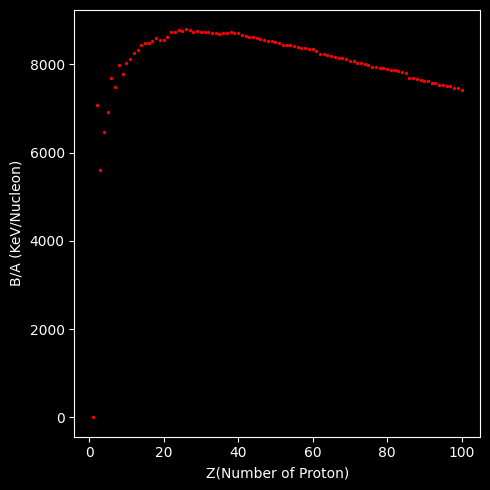

In [34]:
figure = plt.figure(1,figsize=(5,5))
plt.xlabel("Z(Number of Proton)")
plt.ylabel("B/A (KeV/Nucleon)")
plt.scatter(numberOfProton,bindingEnergy,s=2,c="red")
plt.tight_layout()
plt.show()

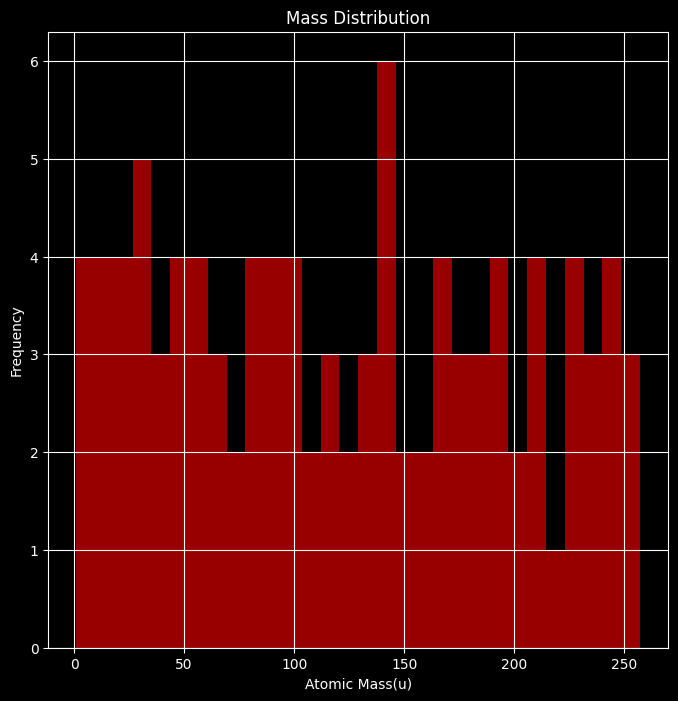

In [36]:
plt.figure(figsize=(8,8))
plt.hist(data["ATOMIC MASS (u)"],bins=30,alpha=0.6,color="red")
plt.xlabel("Atomic Mass(u)")
plt.ylabel("Frequency")
plt.title("Mass Distribution")
plt.grid(True)
plt.show()

**The main fusion reaction in stars like the Sun is the proton-proton (p-p) chain reaction. This reaction involves several steps where hydrogen nuclei (protons) fuse to form helium. The most basic form of this reaction can be summarized in three key steps, eventually resulting in the formation of a helium-4 nucleus from four protons.**

* Proton-Proton Chain Reaction:

  **Two protons fuse to form deuterium:**

  > $1 \text{H} + 1 \text{H} \rightarrow 2 \text{H} + e^+ + \nu_e + 0.42 \text{MeV}$

  **Deuterium fuses with another proton to form helium-3:**

  > $2 \text{H} + 1 \text{H} \rightarrow 3 \text{He} + \gamma + 5.49 \text{MeV}$ , where $\gamma$: Gamma ray, a form of electromagnetic radiation

  **Two helium-3 nuclei fuse to form helium-4, releasing two protons:**

  > $3 \text{He} + 3 \text{He} \rightarrow 4 \text{He} + 1 \text{H} + 1 \text{H} + 12.86 \text{MeV}$


* The main fusion reaction in the sun is the following:
> $4{^{1.0078}_{1}H^{+}}\rightarrow{^{4.0026}_{2}He^{2+}}+2e^{+}+2\nu_{e}$

  where:

  $H^{+}$: hydrogen nucleus (a proton)

  $^{4.0026}_{2}He^{2+}$: a Helium nucleus

  $e^{+}$: a positron

  $\nu_{e}$: electron neutrino

* We can use this equation to calculate Q-value for reaction. The Q-value is typically expressed in energy units like mega-electronvolts (MeV). To calculate the Q-value of a nuclear reaction:

> $Q = (\text{Mass of reactants} - \text{Mass of products}) \times c^2$

> $Q/c^2 = 4 \Delta{^{1.0078}_{1}H^{+}}-\Delta{^{4.0026}_{2}He^{2+}}-4m_e$

  - **Positive Q-value**: Indicates an exothermic reaction, where energy is released. Most nuclear fusion and fission reactions have positive Q-values, meaning they release energy.
  - **Negative Q-value**: Represents an endothermic reaction, where energy is absorbed.




In [37]:
massElectrons = 511 #KeV, 2 mass of electrons from Helium and 2 mass of electrons from positrons

In [40]:
data.head()

,N-Z,N,Z,A,EL,MASS EXCESS (keV),MASS EXCESS ERROR (keV),BINDING ENERGY (keV),BINDING ENERGY ERROR (keV),ATOMIC MASS (u),ATOMIC MASS ERROR(u)
0,-1,0,1,1,H,7288.97061,0.00009,0.000,0.000,1.007825,9.000000e-11
1,0,2,2,4,He,2424.91561,0.00006,7073.915,0.000,4.002603,6.000000e-11
2,1,4,3,7,Li,14907.10529,0.00423,5606.439,0.001,7.016003,4.540000e-09
3,1,5,4,9,Be,11348.45300,0.07700,6462.668,0.009,9.012183,8.200000e-08
4,1,6,5,11,B,8667.70700,0.01200,6927.732,0.001,11.009305,1.300000e-08


In [43]:
QValueWithElectrons = 4*data["MASS EXCESS (keV)"][0]-data["MASS EXCESS (keV)"][1] - 4*massElectrons
print(f"Q Value: {QValueWithElectrons} KeV or {QValueWithElectrons/1000} MeV")

Q Value: 24686.96683 KeV or 24.686966830000003 MeV


**If the two positrons annihilate with two electrons in the plasma (which they most likely will) then an extra of energy is produced**

In [44]:
QValue = 4*data["MASS EXCESS (keV)"][0]-data["MASS EXCESS (keV)"][1]
print(f"Q Value: {QValue} KeV or {QValue/1000} MeV")

Q Value: 26730.96683 KeV or 26.73096683 MeV


Or we can use this simple calculation:

In [46]:
massProtonAMU = 1.0078  # Mass of a proton in atomic mass units (u)
massHeliumAMU = 4.0026  # Mass of a Helium-4 nucleus in atomic mass units (u)
amuToMeV = 931.49410242  # Conversion factor from amu to MeV

In [47]:
# Q = (Mass of reactants - Mass of products) * c^2
massOfreactants = 4*massProtonAMU # Mass of four protons
massOfProduct = massHeliumAMU # Mass of Helium-4 nucleus
QValueMeV = (massOfreactants-massOfProduct)*amuToMeV
print(f"Q-Value: {QValueMeV} MeV")

Q-Value: 26.64073132921196 MeV


In [52]:
totalProtonMass = 4*massProtonAMU # mass of 4 protons (reactants) - helium
massDefect = totalProtonMass-massHeliumAMU
print(f"Mass Defect for Helium-4: {massDefect} AMU")

Mass Defect for Helium-4: 0.02859999999999996 AMU


In [53]:
# Convert mass defect to energy (MeV)
QValueDefect = massDefect*amuToMeV
print(f"Q-Value for Defect: {QValueDefect} MeV")

Q-Value for Defect: 26.64073132921196 MeV


In [55]:
protonEnergy = massProtonAMU*amuToMeV
print(f"Single Proton Energy: {protonEnergy} MeV")

Single Proton Energy: 938.759756418876 MeV


# Fusing Hydrogen in The Sun

**The Q-value is approximately 0.7% the energy of the original 4 Hydrogen atoms. We can use this fact to estimate how long the sun can shine by fusing Hydrogen only.**

In [61]:
totalEnergyProtons = 4*massProtonAMU*amuToMeV
print(f"Total Proton Energy: {totalEnergyProtons} MeV")

Total Proton Energy: 3755.039025675504 MeV


In [63]:
approxEnergyMeVFraction = (QValueMeV/totalEnergyProtons)*100
print(f"Approximately 0.7 times the energy of the original 4 hydrogen atoms: {approxEnergyMeVFraction} %")

Approximately 0.7 times the energy of the original 4 hydrogen atoms: 0.7094661639214118 %


- The sun was initially 100% Hydrogen
- The sun can only convert the inner 10% to Helium

This means only $0.007 \times 0.1 \times M_o(\text{the mass of the sun})$ is converted to energy

In [ ]:
massSun = 1.989*10**30 # kg
speedofLight = 299792458 # m/s

In [60]:
energyNuclear = 0.007*(0.1*massSun)*speedofLight**2
print(f"Total Energy from fusing Hydrogen in the Sun: {energyNuclear} J")

Total Energy from fusing Hydrogen in the Sun: 1.2513368353552714e+44 J


In [64]:
luminositySun = 3.828*10**26 # W (J/s)

In [67]:
# Divide the total energy by the energy radiated per second by the Sun (the luminosity of the sun)
timeNuclear = energyNuclear/luminositySun
print(f"Sun's Hydrogen fusing lifetime: {timeNuclear} sec or {timeNuclear/3600/24/365.25:.1e} years")

Sun's Hydrogen fusing lifetime: 3.2689050035404166e+17 sec or 1.0e+10 years


**Our Sun will spend approximately 10 billion years on the main sequence by our calculations**

# Coulomb Barrier
* The Coulomb barrier is a concept in nuclear physics referring to the energy barrier due to electrostatic force that two positively charged nuclei (like protons) must overcome in order to get close enough to each other for nuclear fusion to occur. This barrier arises because like charges repel each other, and overcoming this repulsion requires a significant amount of energy.
  - **Electrostatic Repulsion**: Protons, being positively charged, repel each other due to the electrostatic force, described by Coulomb's law.
  - **Overcoming the Barrier**: To fuse, the protons must come close enough for the strong nuclear force (which is attractive at short ranges) to overcome this electrostatic repulsion.

* The Coulomb barrier can be calculated using the formula derived from Coulomb's law:
> $E = \frac{k \cdot q_1 \cdot q_2}{r}$

where:

$E$: the energy of the Coulomb barrier

$k$: Coulomb's constant ($8.9875 \times 10^9 Nm^2 / C^2$)

$q_1$ and $q_2$: the charges of the interacting particles (for protons, this is the elementary charge $e = 1.602 \times 10^{-19} \text{Coulombs}$)

$r$: the distance at which the nuclear forces start to dominate over electrostatic forces ($1 \text{fm} = 1 \times 10^{-15} \text{meters}$), where "fm = femtometer"

In [68]:
def CalculateCoulombBarrier(q1:int or float,q2:int or float,distance:int or float)->int or float:
  """
    Calculate the Coulomb barrier for two charged particles.

    q1:param q1: Charge of the first particle in Coulombs
    q2:param q2: Charge of the second particle in Coulombs
    distance:param r: Distance at which the fusion occurs in meters
    :return: Coulomb barrier energy in Joules
  """
  coulombConstant = 8.9875517873681764e9  # Coulomb's constant in Nm^2/C^2
  return coulombConstant*(q1*q2/4)

In [69]:
chargeProton = 1.602176634e-19  # Charge of a proton in Coulombs
distanceFM = 1e-15 # Typical distance for nuclear forces in meters

In [70]:
coulombBarrier = CalculateCoulombBarrier(chargeProton,chargeProton,distanceFM)
print(f"Coulomb Barrier: {coulombBarrier} J")

Coulomb Barrier: 5.767693877714296e-29 J


**The first stage of fusion in a star is two protons colliding. To fuse they need to overcome their repulsion. More precisely they need to overcome the Coulomb Barrier by having a certain energy.**

This potential energy barrier (Coulomb Barrier) is approximated by the electric potential energy, we can use this formula too:
> $V_{c}(r) = 14.3996 \times \frac{Z_1 \cdot Z_2 \cdot e^2}{r}$

where:

$Z_1$ and $Z_2$: the atomic numbers

$e$: the charge of an electron

At distances greater than:
> $r_n \approxeq 1.44\times10^{-15}(A_1^{\frac{1}{3}}+A_2^{\frac{1}{3}}) m$

The potential energy at the top of the barrier is:
> $V_b \approxeq V_c(r_n) = Z_{1}Z_{2} / (A_1^{\frac{1}{3}}+A_2^{\frac{1}{3}}) MeV$

In [71]:
distanceFM = 1.44*(1**(1/3)+1**(1/3)) # fm, ignored the 10^-15

In [75]:
distanceRange = np.arange(0,10.01,0.01) # fm
balanceIndexR = np.where(distanceFM==distanceRange)[0][0] # index where distance=distanceFM

In [76]:
vc = np.zeros(len(distanceRange))

In [77]:
for index in range(balanceIndexR+1,len(distanceRange)):
  # we need to convert r to Angstrom and then divide by a million to get MeV
  # e is 1 in units of eV
  vc[index] = 14.3996/(distanceRange[index]/100000)/1000000 # MeV

In [78]:
# set the barrier potential energy at distanceFM
vb = 1/(1**(1/3)+1**(1/3))
vc[balanceIndexR] = vb #MeV

In [79]:
# set the nuclear well potential energy to the binding energy of the product (in this case deuterium)
bindingEnergyDeuterium = -1112.283/1000 # MeV

In [80]:
for index in range(0,balanceIndexR):
  vc[index] = bindingEnergyDeuterium

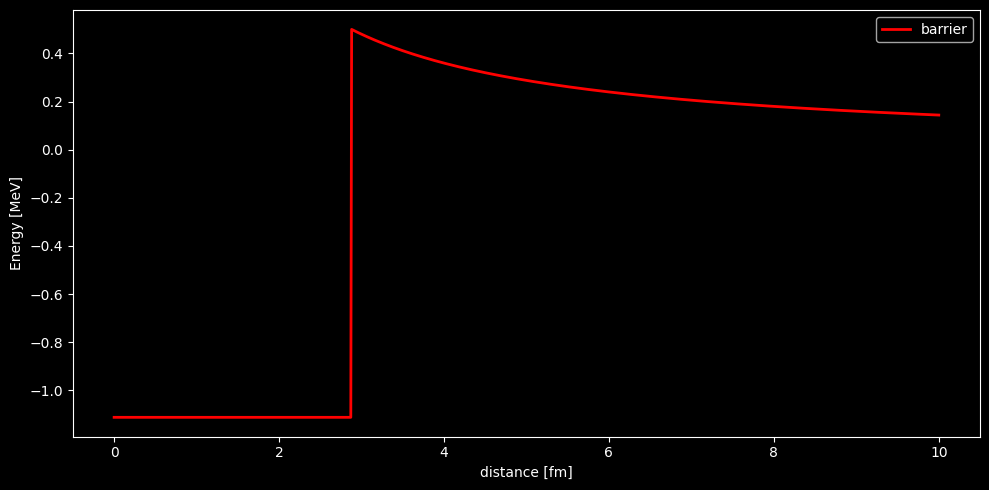

In [81]:
figure = plt.figure(figsize=(10,5))
plt.xlabel("distance [fm]")
plt.ylabel("Energy [MeV]")
plt.plot(distanceRange,vc,c="red",linewidth=2,label="barrier")
plt.legend()
plt.tight_layout()
plt.show()

we can try this too:

In [87]:
elementaryCharge = 1.602176634e-19  # Charge of a proton (or deuterium nucleus) in Coulombs
distanceStart = 0.1e-15  # Starting distance in meters (1 femtometer)
distanceEnd = 10e-15  # Ending distance in meters (10 femtometers)
points = 1000 # Number of points in the graph

In [88]:
def CoulombPotentialEnergy(z1:int or float,z2:int or float,distance:int or float)->int or float:
  "Calculate the Coulomb potential energy between two charged particles"
  coulombConstant = 8.9875517873681764e9 # Coulomb's constant (Nm^2/C^2)
  return coulombConstant*(z1*elementaryCharge)*(z2*elementaryCharge)/distance

In [89]:
# Generate distances from 0.1 fm to 10 fm
distanceRange = np.linspace(distanceStart,distanceEnd,points) # in meters

In [90]:
zDeuteron = 1 # Charge number for deuterium

In [91]:
V_CoulombBarrier = CoulombPotentialEnergy(zDeuteron,zDeuteron,distanceRange)

In [92]:
# Convert energy from Joules to MeV
VMeV = V_CoulombBarrier/(1.60218e-13)

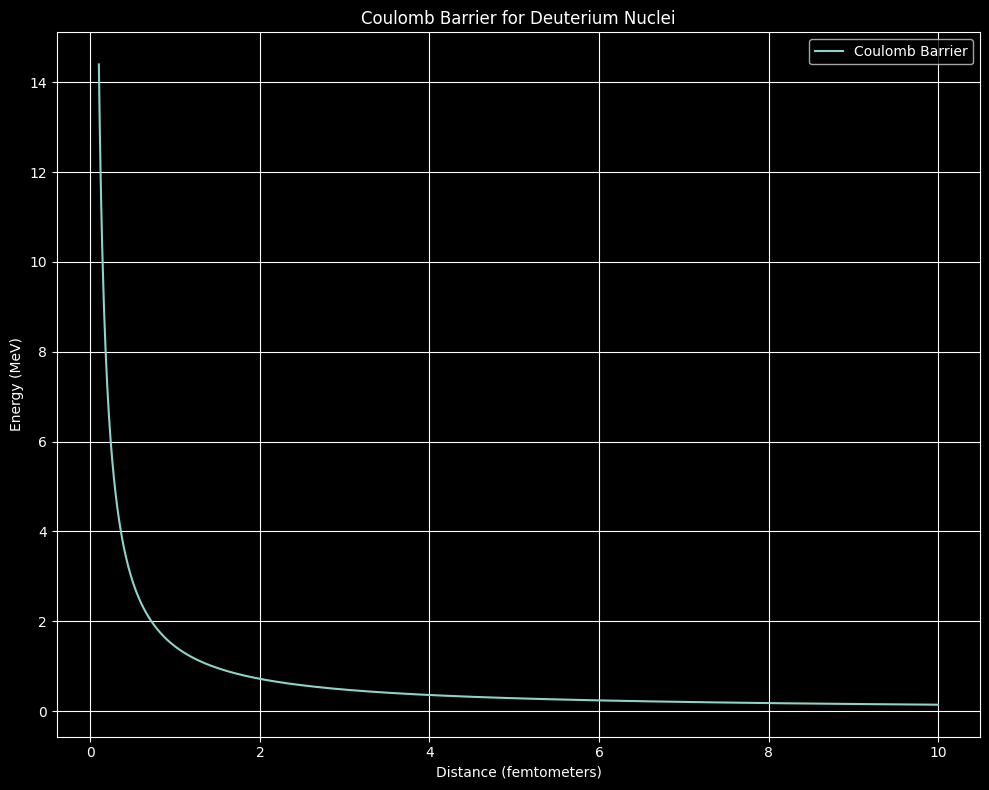

In [94]:
plt.figure(figsize=(10,8))
plt.plot(distanceRange*1e15,VMeV,label="Coulomb Barrier")
plt.xlabel("Distance (femtometers)")
plt.ylabel("Energy (MeV)")
plt.yscale("log") # Logarithmic scale on the y-axis
plt.title("Coulomb Barrier for Deuterium Nuclei")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()